# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Part a

In [ ]:
df_titanic = pd.read_csv('/content/drive/MyDrive/Data Mining/HW2/titanic.csv')

In [ ]:
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0], inplace=True)
df_titanic.dropna(axis=0, inplace=True)

In [ ]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1

In [ ]:
df_titanic.drop(['Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df_titanic = pd.get_dummies(df_titanic, columns = ['Embarked', 'Sex', 'Cabin'])
df_titanic.head()

,Survived,Pclass,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
1,1,1,38.0,71.2833,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,53.1000,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,54.0,51.8625,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,3,4.0,16.7000,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
11,1,1,58.0,26.5500,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_titanic.loc[:, df_titanic.columns!='Survived']
y = df_titanic.loc[:, 'Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 156), (62, 156), (142,), (62,))

# Part b

In [ ]:
 ### If base_estimator==None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
clf_ens = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ens.fit(X_train, y_train)
y_pred = clf_ens.predict(X_test)
print(f'Accuracy on train: {clf_ens.score(X_train, y_train)}')
print(f'Accuracy on test: {accuracy_score(y_pred, y_test)}')


Accuracy on train: 1.0
Accuracy on test: 0.7580645161290323


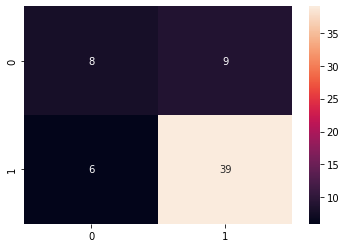

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)